# Before your start:
- Read the README.md file.
- Comment as much as you can and use the resources (README.md file).
- Happy learning!

In [2]:
# Libraries
import matplotlib.pyplot as plt
from scipy.stats import norm, binom, poisson

# Challenge 1 - Generate and Plot Normal Distributions
#### Step 1: Generate samples and test normal distribution.

Use mean=50, standard_deviation=5, and sample_size=[10, 50, 500, 5000] to generate 4 random samples that are normally distributed.

**Hint**: Read the documentation for `scipy.stats.norm.rvs`. The function will help you create the normal random samples.

In [3]:
mean = 50
standard_deviation = 5
sample_sizes = [10, 50, 500, 5000]

samples = [norm.rvs(loc = mean, scale = standard_deviation, size = size) for size in sample_sizes]

#### Step 2: Plot normal distributions.

To check the shape of the samples you have just created, you can use matplotlib. For example, you can use it to plot a histogram of each sample. 

If you did, your outputs would be really similar to the ones below:

![normal distributions with different sample sizes](./images/ch-1.png)

C:\Users\bmila\AppData\Local\Temp\ipykernel_47312\689583859.py:4: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  i = samples.index(sample)


<function matplotlib.pyplot.show(close=None, block=None)>

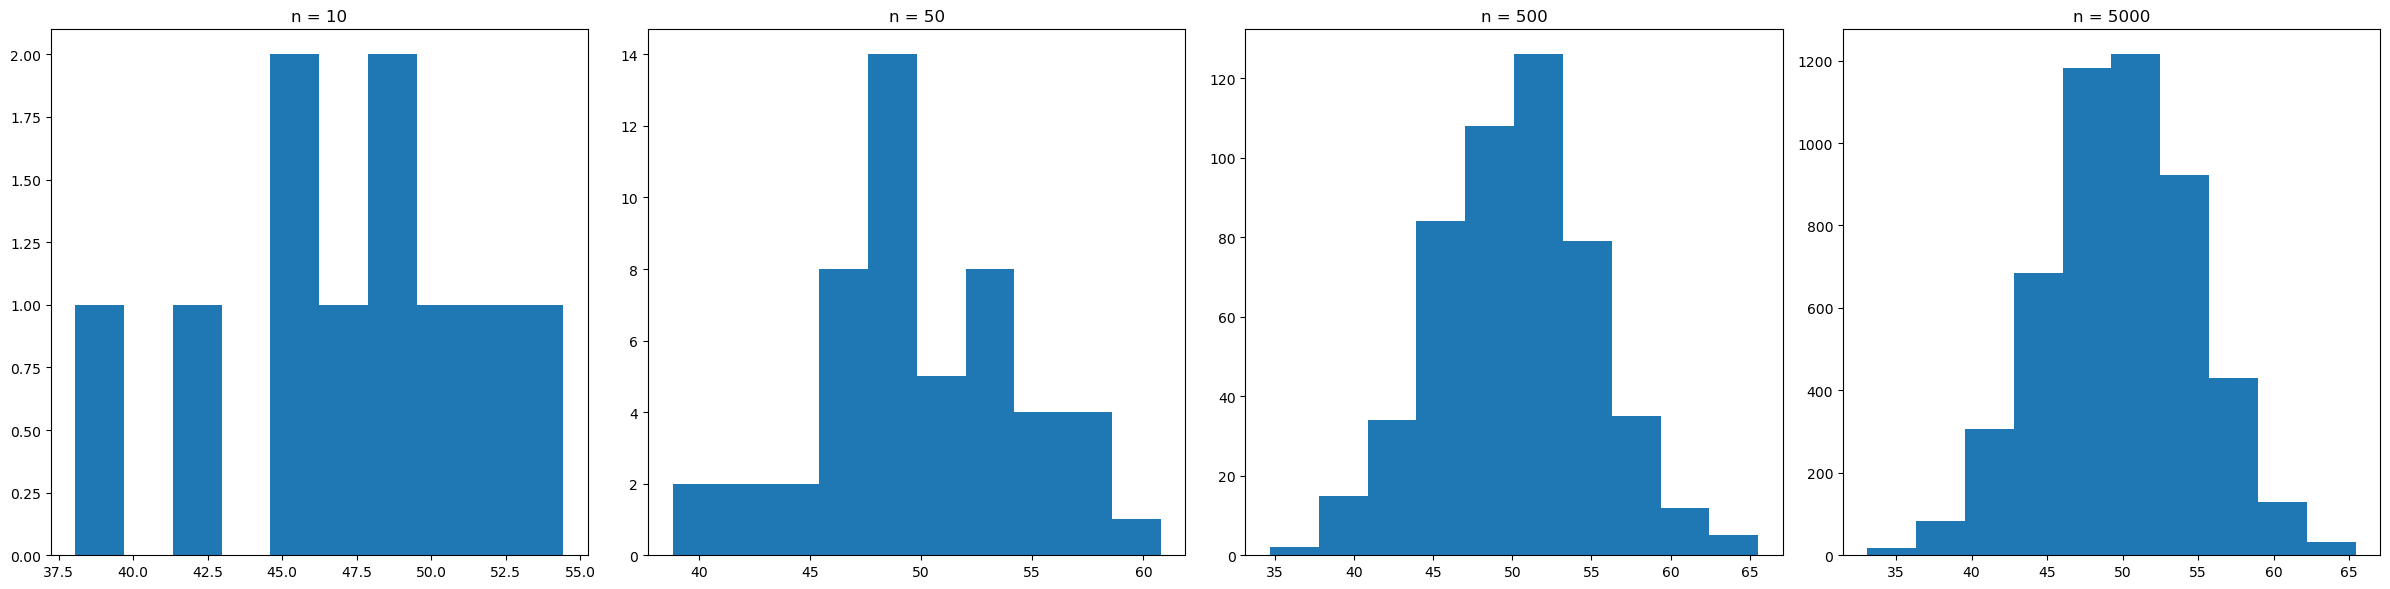

In [4]:
fig, axs = plt.subplots(1, len(samples), figsize = (24,6))

for sample in samples:
    i = samples.index(sample)
    axs[i].hist(sample)
    axs[i].set_title(f'n = {len(sample)}')

fig.tight_layout()
plt.show

#### Compare the distributions above. What do you observe? Explain with the Central Limit Theorem.

In [5]:
"""
As sample sizes increase, the approximate normal distribution improves.
"""

'\nAs sample sizes increase, the approximate normal distribution improves.\n'

#### Bonus: Plot normal distributions.

Even though you still don't know how to use matplotlib, as a bonus challenge, you can try to reproduce the plot above using the samples you have created. This plotting library will be introduced later this week, so don't worry if you don't manage to get the results you want now: you can always come back to solve this challenge later.

# Challenge 2 - Plot Probability Mass Function (PMF)

### Background knowledge

[PMF](https://en.wikipedia.org/wiki/Probability_mass_function) shows the probability distribution of a **discrete random variable**. A [discrete random variable](https://en.wikipedia.org/wiki/Random_variable#Discrete_random_variable) has random numeric values that are not continuous. For example, the number of people in a household can only be integers but not floats. Therefore the number of people in a household is a discrete variable.

### Challenge

We assume that the probability of clicking an advertisement in a Youtube video is 0.15. We have a sample of 5 people who watched the video and we want to plot the PMF for a binomial distribution.

#### Step 1: Create the binomial distribution mentioned above. Store the result in a variable called `dist`. 
**Hint**: use binom from `scipy.stats.binom`. This object takes *n* and *p* as shape parameters, where *n* is the number of independent experiments and *p* the probability of success of the experiment.

In [6]:
p = 0.15 # Probability of clicking an advertisement in a Youtube video.
n = 5 # Number of people who watched the video.

dist = binom(n = n, p = p)

#### Step 2: Plot the PMF of the distribution. 
To do it, run the code in the cell below. 

**Hint**: Your output should look like the one below:

![binom 10](./images/ch-2.png)

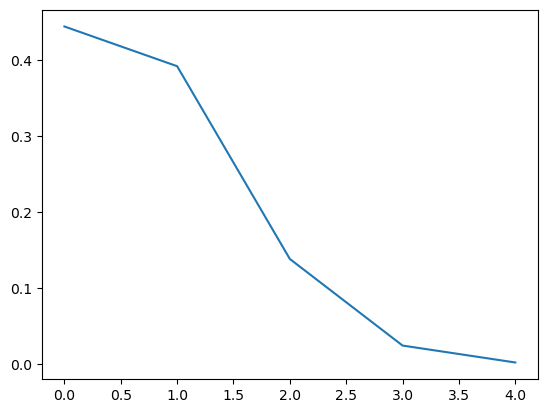

In [7]:
# run this code
x = range(n)

fig, ax = plt.subplots(1, 1)

plt.plot(x, dist.pmf(x))

plt.show()

#### Step 3: Explain what you observe from the plot above.

In [8]:
"""
x represents the number of successes. As it increases, the probability of getting x successes (each with a probability of 15%) in 5 trials disminishes.
"""

'\nx represents the number of successes. As it increases, the probability of getting x successes (each with a probability of 15%) in 5 trials disminishes.\n'

#### Step 4: Now plot PMF with 50, 500, and 5000 visitors.
To plot the PMF, you can copy the code given above and replace variable `dist` for the name of the variables where you have stored the new binomial objects for 50, 500 and 5000 visitors.

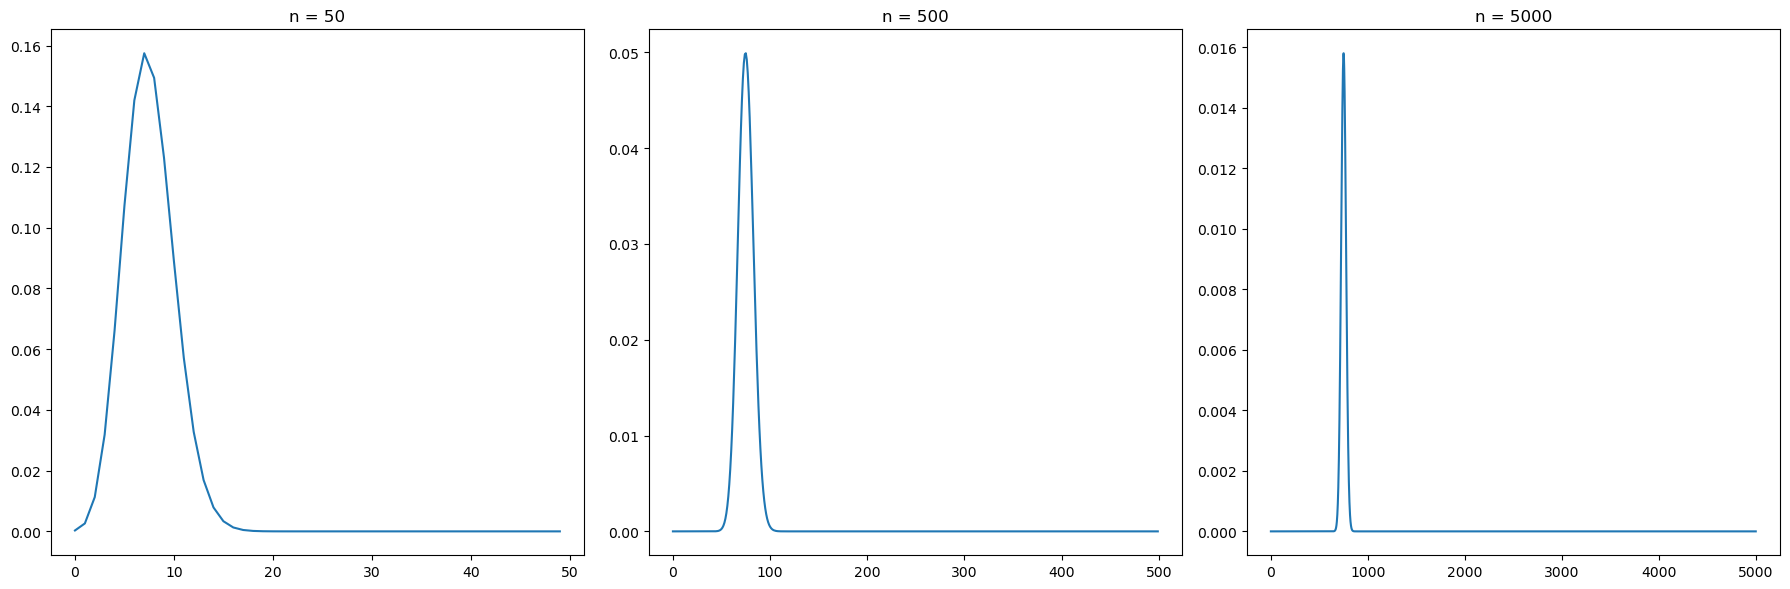

In [9]:
ns = [50, 500, 5000]
dists = [binom(n = n, p = p) for n in ns]

fig, axs = plt.subplots(1, len(dists), figsize = (18, 6))
for dist in dists:
    i = dists.index(dist)
    n = ns[i]
    x = range(n)
    axs[i].plot(x, dist.pmf(x))
    axs[i].set_title(f'n = {n}')

fig.tight_layout()
plt.show()

#### Step 5: What did you notice from the distribution plots? Comment your findings.

In [10]:
"""
We see a peak in each plot at approx 7.5 (for n = 50), 75 (for n = 500), and 750 (for = 5000)
i.e. equals to p*n (expected value)
i.e. the closer we are to this value, the higher the probability (which is logic).
"""

'\nWe see a peak in each plot at approx 7.5 (for n = 50), 75 (for n = 500), and 750 (for = 5000)\ni.e. equals to p*n (expected value)\ni.e. the closer we are to this value, the higher the probability (which is logic).\n'

# Challenge 3
#### Step 1: Research the Poisson distribution. Write about your own understanding of the Poisson distribution.

In [11]:
"""
Discrete probability distribution that expresses the probability of a given number of events occurring in a fixed interval of time or space
if these events occur with a known constant mean rate and independently of the time since the last event.
"""

'\nDiscrete probability distribution that expresses the probability of a given number of events occurring in a fixed interval of time or space\nif these events occur with a known constant mean rate and independently of the time since the last event.\n'

#### Step 2: A website has an average of 300 visits per day. What is the probability of getting 320 visitors in a day?

**Hint**: use `scipy.stats.poisson.pmf`.

In [12]:
target_visits_per_day = 320 # k
mean_visits_per_day = 300 # mu (average number of occurences)

poisson.pmf(k = target_visits_per_day, mu = mean_visits_per_day)
# 1.2%

0.011612348610402475

#### Step 3: What is the probability of getting 60 visits?

In [13]:
target_visits_per_day = 60 # k

poisson.pmf(k = target_visits_per_day, mu = mean_visits_per_day)
# Almost close to 0.

2.622743762294515e-64

#### Step 4: Create a list to store the Poisson distribution probabilities for 0 to 1000 visitors. Store your list in a variable called `arr`.

In [14]:
arr = [poisson.pmf(k, mu = mean_visits_per_day) for k in range(0, 1000+1)]

#### Step 5: Plot the probabilities.
To do it, run the code in the cell below. Your plot should look like the one below:

![poisson distribution](./images/ch-3.png)

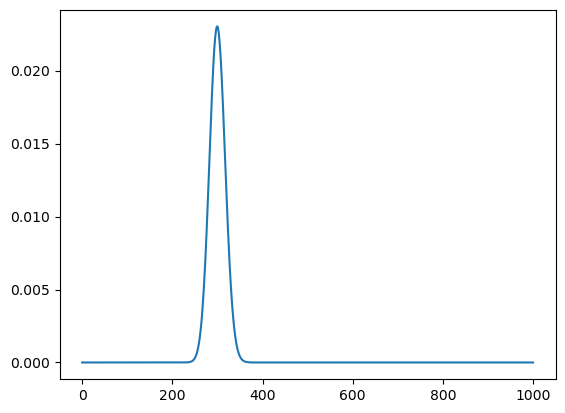

In [15]:
# run this code
plt.plot(arr)
plt.show()

# Challenge 4 - Central Limit Theorem

A delivery company needs 35 minutes to deliver a package, with a standard deviation of 8 minutes. Suppose that in one day, they deliver 200 packages.

**Hint**: `stats.norm.cdf` can help you find the answers.

#### Step 1: What is the probability that the mean delivery time today is between 30 and 35 minutes?

In [16]:
time_delivery = 35
time_delivery_std = 8
nb_packages = 200

rv = norm(loc = time_delivery, scale = time_delivery_std/nb_packages**(1/2)) # standard error

rv.cdf(35) - rv.cdf(30)
# 50%

0.5

#### Step 2: What is the probability that in total, it takes more than 115 hours to deliver all 200 packages?

In [17]:
lower_bound_hours = 115
lower_bound_minutes = lower_bound_hours * 60
avg_time_per_package = lower_bound_minutes / nb_packages


# rv.cdf(x) will return the cumulative probability of rv <= x
# We want the probability of rv > x (i.e. the complementary), so we need to compute 1 - rv.cdf(x)

1-rv.cdf(avg_time_per_package)
# 81.2%

0.8116204410942089

# Challenge 5 - Normal Variables
The value (in thousands) of the monthly sales of a publishing company follows a normal distribution with a mean equal to 200 and a standard deviation equal to 40.

<div align="center">$X → N(200,40)$</div>

**Hint**: `stats.norm.cdf` can help you find the answers.

#### Step 1: Find the probability that the monthly sales are more than 300.

In [18]:
rv = norm(loc = 200, scale = 40)

1- rv.cdf(300)

# 0.6%

0.006209665325776159

#### Step 2: Find the probability that the monthly sales fall between 160 and 240.

In [19]:
rv.cdf(240) - rv.cdf(160)
# 68.3%

0.6826894921370859

#### Step 3: Find the probability that the monthly sales do not exceed 150.

In [20]:
rv.cdf(150)
# 10.5%

0.10564977366685535

#### Step 4: Find the probability that the monthly sales exceed 3000.

In [21]:
1 - rv.cdf(3000)
# 0%

0.0

# Challenge 6 - Poisson distribution
The mean number of violent robberies per month that are registered in a particular barrio is 4.

**Hint**: `stats.poisson.cdf` can help you find the answers.

#### Step 1: Find the probability that in a particular month there is no violent robbery.

In [22]:
mu = 4

rv = poisson(mu)

rv.pmf(0)

# 1.8%

0.01831563888873418

#### Step 2: Find the probability that there are at least 1 robbery in a given month.

In [23]:
1 - rv.pmf(0)
# 98.2%

0.9816843611112658

#### Step 3: Find the probability that there are between 2 and 6 (inclusive) robberies in a given month.

In [24]:
sum([rv.pmf(i) for i in range(2, 6+1)])
# 79.8%

0.7977478271537553

#### Step 4: Find the probability that there are more than 2 robberies in 15 days.

In [25]:
# We need to define a new random variable with mu = 2 (average for a month is 4, so average for 15 days is 2)
1 - poisson(mu = 2).cdf(2)
# 32.3%

0.3233235838169366

In [26]:
# Using PMF
1 - sum([poisson(mu = 2).pmf(i) for i in range(2+1)])

0.3233235838169365